# Project - Artificial Neural Networks: Street View Housing Number Digit Recognition

### Solution notebook by Shweta Chandole
#### Date: 12-Dec-2021

Welcome to the project on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a feed forward neural network model that can identify the digits in the images. 

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [3]:
print(tf.__version__)

2.7.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [4]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/ADSP/Deep Learning/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

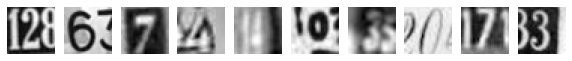

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to flatten them. Figure out the required shape
- Normalise the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [7]:
# Shape of the images and the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

#### **Question 1: Normalize the train and test data (2 Marks)**

In [9]:
# Adding code to answer Q1 -ShwetaC

# Normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [10]:
# New shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [11]:
#one hot encode output 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
# no.of classes 
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# check one individual record of y_train and y_test variable to see one hot encoding applied to these variables.
print('y_train[0] = ', y_train[0], '\ny_test[0] = ', y_test[0])     #SC

y_train[0] =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
y_test[0] =  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
# New shape of train and test variables after flattening input variables and one hot encoding target variables -ShwetaC
X_train.shape, y_train.shape, X_test.shape, y_test.shape #SC

((42000, 1024), (42000, 10), (18000, 1024), (18000, 10))

**Observations**
- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now, we have done the data preprocessing, let's build an ANN model.

In [15]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **64 nodes and relu activation** and the input shape which is used above
 - Second hidden layer with **32 nodes and relu activation**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Question 2: Build and train a ANN model as per the above mentioned architecture (10 Marks)**

In [16]:
# Adding code to answer Q2 - ShwetaC 

#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = Sequential()

    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(64, activation='relu', input_shape=(1024,)))          #first hidden layer 
    model.add(Dense(32, activation='relu'))                               #second hidden layer 
    model.add(Dense(10, activation = 'softmax'))                          #output layer 

    #declare adam optimizer with learning rate of 0.001 
    adamopt = optimizers.Adam(learning_rate=0.001)                        
    
    #compile the model
    model.compile(loss= 'categorical_crossentropy', optimizer=adamopt, metrics= ['accuracy'])     
    
    return model

In [17]:
# Build the model
model_1 = nn_model_1()

In [18]:
# Adding code to answer Q2 - ShwetaC

#Print the summary
model_1.summary()       

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Adding code to answer Q2 - ShwetaC

# Fit the model
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=20, batch_size=128)   

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2993 - accuracy: 0.1179 - val_loss: 2.2594 - val_accuracy: 0.1463
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.1130 - accuracy: 0.2276 - val_loss: 1.9376 - val_accuracy: 0.3279
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.7953 - accuracy: 0.3824 - val_loss: 1.6499 - val_accuracy: 0.4551
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5726 - accuracy: 0.4828 - val_loss: 1.4957 - val_accuracy: 0.5094
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4604 - accuracy: 0.5268 - val_loss: 1.4267 - val_accuracy: 0.5357
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4008 - accuracy: 0.5503 - val_loss: 1.3652 - val_accuracy: 0.5613
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3588 - accuracy: 0.5682 - val_loss: 1.3282 - val_accuracy: 0.5799
Epoch 

### **Plotting the validation and training accuracies**

#### **Question 3: Write your observations on the below plot (2 Marks)**

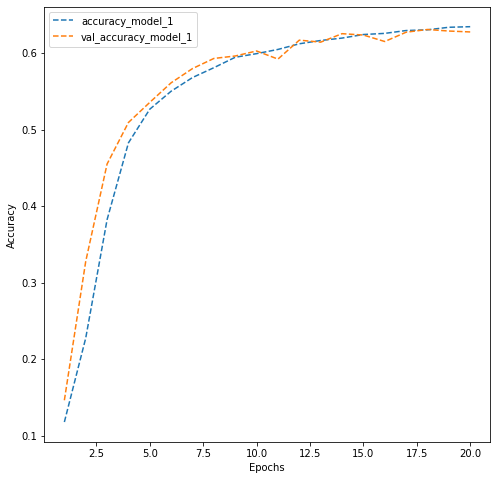

In [20]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy_model_1')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy_model_1')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations: (Answer to Q3 - ShwetaC)**
- Accuracy of the model on training data increases rapidly unto 5 epochs, after which the curve slows down unto 10 epochs, and then becomes slowly rising, almost constant after 10 epochs onwards.
- Accuracy on validation data also increases very similar to the training data, even somewhat better up until 5 to 7.5 epochs. But the validation accuracy graph becomes somewhat flattened and even wobbly after 8 epochs, with some dips around 10th epoch, and then it drops below the training accuracy graph from 15th epoch onwards.
- This indicates that the model fitted smoothly on the training dataset, but it did not show consistently improving accuracy for validation data.
- The overall accuracy of model_1 is quite low with ~63% for training data and ~62%  for test data.



Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [21]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [22]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **256 nodes and relu activation**
 - Second hidden layer with **128 nodes and relu activation**
 - Add the **Dropout layer with rate equal to 0.2**
 - Third hidden layer with **64 nodes and relu activation**
 - Fourth hidden layer with **64 nodes and relu activation**
 - Fifth hidden layer with **32 nodes and relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.0005), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Question 4: Build and train the new ANN model as per the above mentioned architecture (10 Marks)**

In [23]:
# Adding code to answer Q4 - ShwetaC

#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(256, activation='relu', input_shape=(1024,))) #first hidden layer  
    model.add(Dense(128, activation='relu'))			                #second hidden layer
    model.add(Dropout(0.2))							                          #dropout layer 
    model.add(Dense(64, activation='relu'))				                #third hidden layer 
    model.add(Dense(64, activation='relu'))				                #fourth hidden layer 
    model.add(Dense(32, activation='relu'))				                #fifth hidden layer 
    model.add(BatchNormalization())					                      #BatchNormalization layer 
    model.add(Dense(10, activation = 'softmax'))	                #output layer 
    
    #declare adam optimizer with learning rate of 0.0005 
    adamopt = optimizers.Adam(learning_rate=0.0005)     
    
    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adamopt, metrics=['accuracy'])       
    
    return model

In [24]:
# Adding code to answer Q4 - ShwetaC

# Build the model
model_2 = nn_model_2()    

In [25]:
# Adding code to answer Q4 - ShwetaC

#Print the model summary
model_2.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [26]:
# Adding code to answer Q4 - ShwetaC

# Fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=30, batch_size=128)  

Epoch 1/30
263/263 [==============================] - 3s 10ms/step - loss: 2.3475 - accuracy: 0.1018 - val_loss: 2.2903 - val_accuracy: 0.1244
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 2.1435 - accuracy: 0.1857 - val_loss: 2.0421 - val_accuracy: 0.2756
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 1.7642 - accuracy: 0.3826 - val_loss: 1.5526 - val_accuracy: 0.4861
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 1.4718 - accuracy: 0.5024 - val_loss: 1.4331 - val_accuracy: 0.5232
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 1.3157 - accuracy: 0.5648 - val_loss: 1.3021 - val_accuracy: 0.5812
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 1.2174 - accuracy: 0.6085 - val_loss: 1.1028 - val_accuracy: 0.6511
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 1.1441 - accuracy: 0.6333 - val_loss: 1.0375 - val_accuracy: 0.6701
Epoch

### **Plotting the validation and training accuracies**

#### **Question 5: Write your observations on the below plot (2 Marks)**

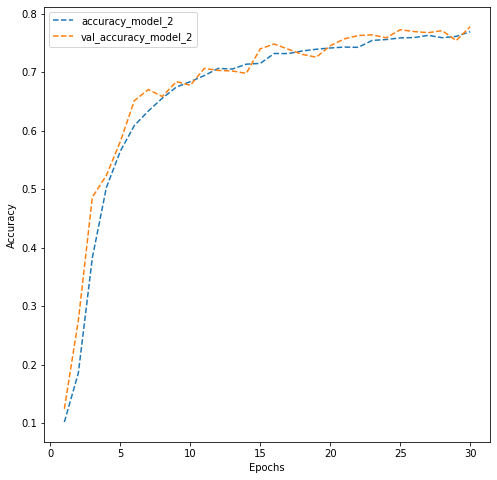

In [27]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy_model_2')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy_model_2')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations: (Answer to Q5 - ShwetaC)**
- Accuracy of training data as well as validation data is improved as compared to the previous model.
- The accuracy graph for both datasets rises rapidly until around 10th epoch, after which it continues to rise slow and steadily till the last epoch.
- The accuracy of training data rises more smoothly, while that of validation data shows some ups and downs throughout.
- The final accuracy of the training as well as validation data are higher than the previous model at 76.9% and 77.75% respectively’
- Also, the loss for training data has reduced from 1.17 to 0.73, and loss for test data is reduced from 1.18 to 0.72 as compared to model_1
- Overall, model_2 shows better performance with more complexity and robustness as compared to model_1.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [28]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

test_pred   #checking output of Predictions variable test_pred #SC

array([1, 2, 2, ..., 7, 9, 2])

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [29]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Question 6: Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results (4 Marks)**

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1814
           1       0.78      0.80      0.79      1828
           2       0.77      0.80      0.78      1803
           3       0.69      0.77      0.73      1719
           4       0.76      0.85      0.81      1812
           5       0.78      0.71      0.74      1768
           6       0.84      0.71      0.77      1832
           7       0.78      0.83      0.80      1808
           8       0.71      0.75      0.73      1812
           9       0.78      0.75      0.77      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000



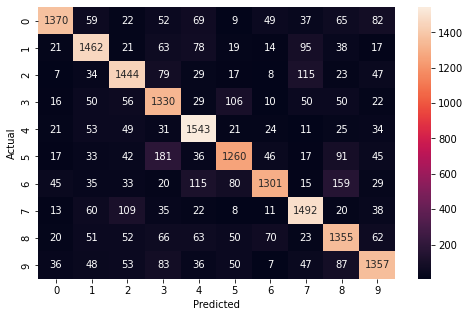

In [30]:
# Adding code to answer Q6 - ShwetaC

#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) #Write the code for creating confusion matrix using actual labels and predicted labels

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations: (Answer to Q6 - ShwetaC)**
- The classification report shows the classification metrics - precision, recall and f1-score for each class
- We can see that the classes '0' and '4' have highest f1-score at 81%, followed by '7' at 80%
- Classes '3' and '8' each have a f1-score of 73% which is the lowest in all classes. These digits also have lowest precision
- As we can see in the confusion matrix heatmap, the model is not very precise in detecting a few images like 
  - a lot of '2's gets predicted as '7', and '7's as '2'
  - '3' is predicted as '5', and even more '5's are predicted as '3'
  - Also, many '6 ' get predicted as '8'
- The accuracy on test data is 77% which is same as the accuracy of validation data as observed earlier. 
- This model is good at predicting most of the classes, as average precision is 78%. However, we can explore further to build and train models with more accuracy in future.



##**Conclusion** (added by ShwetaC)

Our objective in this project was to build a feed forward ANN to identify digits in images. 
- We built 2 models, first of which had a lower accuracy around 63%. 
- Second model was built with more complexity, including more hidden layers with more number of nodes, and more training parameters. This model gave better performance on training and validation data with 77% accuracy. We selected this model to predict values on test dataset.
- The second model gave 77% accuracy on test data as well, implying that it could replicate its performance from training/validation data on test data.
- Overall precision of prediction is 78% which is acceptable but with a scope for improvement.
